In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
onboarding_df = pd.read_csv('data/onboarding_events.csv')

### Data checking

In [3]:
print("Onboarding Dataframe:")
onboarding_df.head(10)

Onboarding Dataframe:


,event,platform,subscription,user id,event time
0,cta_button_clicked_3,platform_3,sub_b,z99qzq99,2023-05-01 0:00:05
1,opened_app,platform_1,sub_b,z99qz311,2023-05-01 0:00:12
2,cta_button_clicked_3,platform_3,sub_b,z99qzq99,2023-05-01 0:00:24
3,cta_button_clicked_3,platform_3,sub_b,z99qzq99,2023-05-01 0:01:19
4,cta_button_clicked_1,platform_2,sub_a,9x931z1,2023-05-01 0:01:20
5,opened_app,platform_1,sub_a,z999www9,2023-05-01 0:01:31
6,cta_button_clicked_3,platform_3,sub_b,z99qzq99,2023-05-01 0:01:39
7,cta_button_clicked_5,platform_3,sub_a,z9999199,2023-05-01 0:01:51
8,opened_app,platform_4,sub_b,z99qz313,2023-05-01 0:01:54
9,opened_app,platform_4,sub_a,z99q0x11,2023-05-01 0:01:57


In [4]:
print("Onboarding DataFrame Summary:")
onboarding_df.describe()

Onboarding DataFrame Summary:


,event,platform,subscription,user id,event time
count,374753,374753,374753,374753,374753
unique,6,5,3,143183,364111
top,opened_app,platform_1,sub_a,zqqwwx13,2023-05-10 18:04:26
freq,170186,194619,193877,60,4


In [5]:
print("Onboarding DataFrame Information:")
onboarding_df.info()

Onboarding DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374753 entries, 0 to 374752
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event         374753 non-null  object
 1   platform      374753 non-null  object
 2   subscription  374753 non-null  object
 3   user id       374753 non-null  object
 4   event time    374753 non-null  object
dtypes: object(5)
memory usage: 14.3+ MB


In [6]:
print("Any Nulls?:")
print(onboarding_df.isnull().sum())

Any Nulls?:
event           0
platform        0
subscription    0
user id         0
event time      0
dtype: int64


In [7]:
print("Data Types:")
print(onboarding_df.dtypes)

Data Types:
event           object
platform        object
subscription    object
user id         object
event time      object
dtype: object


In [8]:
# Convert 'event time' to datetime
onboarding_df['event time'] = pd.to_datetime(onboarding_df['event time'])

# Verify the change
print(onboarding_df.dtypes)

event                   object
platform                object
subscription            object
user id                 object
event time      datetime64[ns]
dtype: object


In [9]:
# Check for duplicate rows
duplicate_rows = onboarding_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates if any
onboarding_df = onboarding_df.drop_duplicates()

Number of duplicate rows: 0


In [10]:
# Strip any leading/trailing spaces from object columns
onboarding_df['event'] = onboarding_df['event'].str.strip()
onboarding_df['platform'] = onboarding_df['platform'].str.strip()
onboarding_df['subscription'] = onboarding_df['subscription'].str.strip()
onboarding_df['user id'] = onboarding_df['user id'].str.strip()

In [11]:
# Check the range of event times
print(f"Event time range: {onboarding_df['event time'].min()} to {onboarding_df['event time'].max()}")

Event time range: 2023-05-01 00:00:05 to 2023-07-19 11:09:07


In [12]:
# Unique values in each categorical column
print(f"Unique events: {onboarding_df['event'].unique()}")
print(f"Unique platforms: {onboarding_df['platform'].unique()}")
print(f"Unique subscriptions: {onboarding_df['subscription'].unique()}")

Unique events: ['cta_button_clicked_3' 'opened_app' 'cta_button_clicked_1'
 'cta_button_clicked_5' 'cta_button_clicked_4' 'cta_button_clicked_2']
Unique platforms: ['platform_3' 'platform_1' 'platform_2' 'platform_4' 'platform_5']
Unique subscriptions: ['sub_b' 'sub_a' 'sub_c']


Daily event count shows a bit of a drop when going into July

Daily Event Count:
 event time
2023-05-01    5454
2023-05-02    4836
2023-05-03    4731
2023-05-04    4773
2023-05-05    4709
              ... 
2023-07-15    4393
2023-07-16    4733
2023-07-17    4698
2023-07-18    4531
2023-07-19    1630
Freq: D, Length: 80, dtype: int64


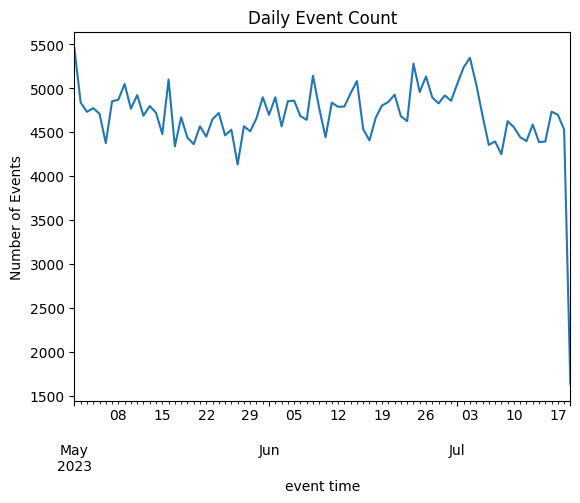

In [13]:
# Checking how events are distributed over time to identify any trends or patterns
daily_event_count = onboarding_df.set_index('event time').resample('D').size()
print("Daily Event Count:\n", daily_event_count)
daily_event_count.plot(title='Daily Event Count')
plt.ylabel('Number of Events')
plt.show()

Event Count by Platform and Subscription Type:
       platform subscription   count
0   platform_1        sub_a  125843
1   platform_1        sub_b   63641
2   platform_1        sub_c    5135
3   platform_2        sub_a    7162
4   platform_2        sub_b    8061
5   platform_2        sub_c     511
6   platform_3        sub_a   22715
7   platform_3        sub_b   52832
8   platform_3        sub_c    1138
9   platform_4        sub_a   38129
10  platform_4        sub_b   48504
11  platform_4        sub_c    1035
12  platform_5        sub_a      28
13  platform_5        sub_b      19


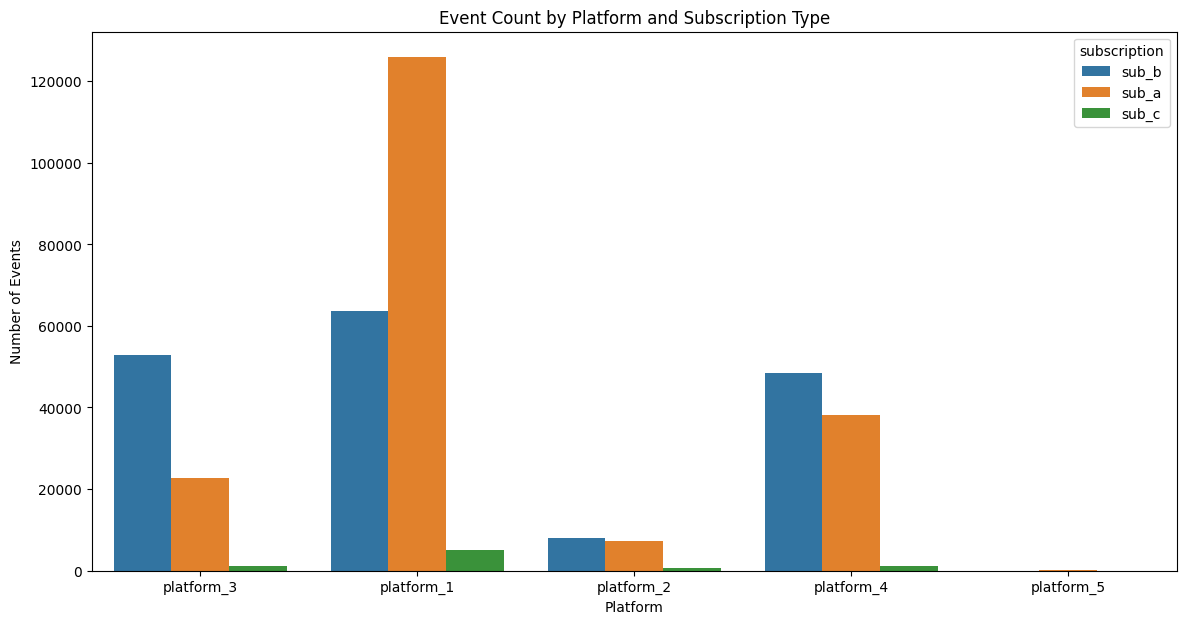

In [14]:
# Event count by platform and subscription type
platform_subscription_count = onboarding_df.groupby(['platform', 'subscription']).size().reset_index(name='count')
print("Event Count by Platform and Subscription Type:\n", platform_subscription_count)
plt.figure(figsize=(14, 7))
sns.countplot(data=onboarding_df, x='platform', hue='subscription')
plt.title('Event Count by Platform and Subscription Type')
plt.xlabel('Platform')
plt.ylabel('Number of Events')
plt.show()

Top 10 Users with Most Events:
 user id
zqqwwx13    60
zqx990wx    53
zq11011z    50
zq1z99zx    50
zq1310zz    48
z9903zx1    44
zq19x913    42
zq911991    39
z99z1qx9    39
zq99qz9x    39
Name: count, dtype: int64


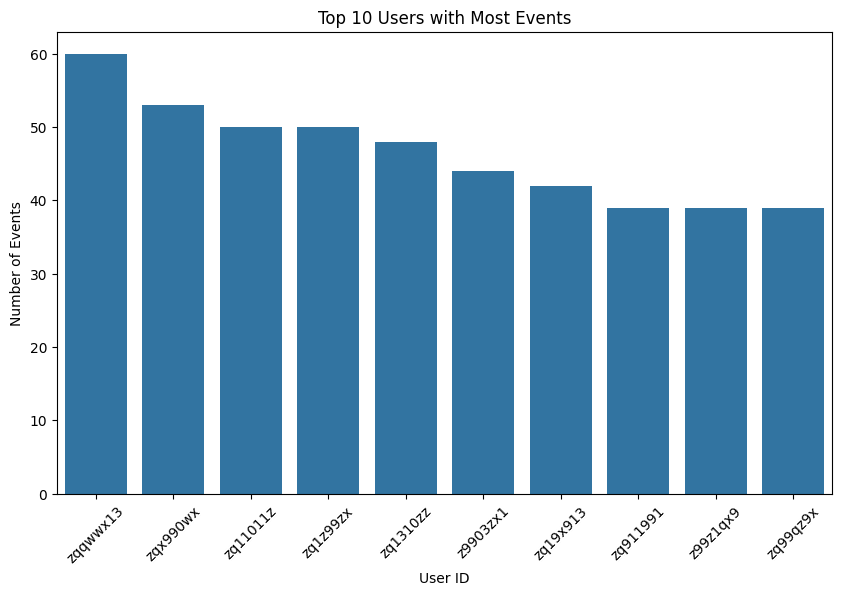

In [15]:
# Top 10 users with most events
top_users = onboarding_df['user id'].value_counts().head(10)
print("Top 10 Users with Most Events:\n", top_users)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title('Top 10 Users with Most Events')
plt.xlabel('User ID')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

Event Type Distribution:
 event
opened_app              170186
cta_button_clicked_5     71897
cta_button_clicked_3     51593
cta_button_clicked_1     49755
cta_button_clicked_4     22411
cta_button_clicked_2      8911
Name: count, dtype: int64


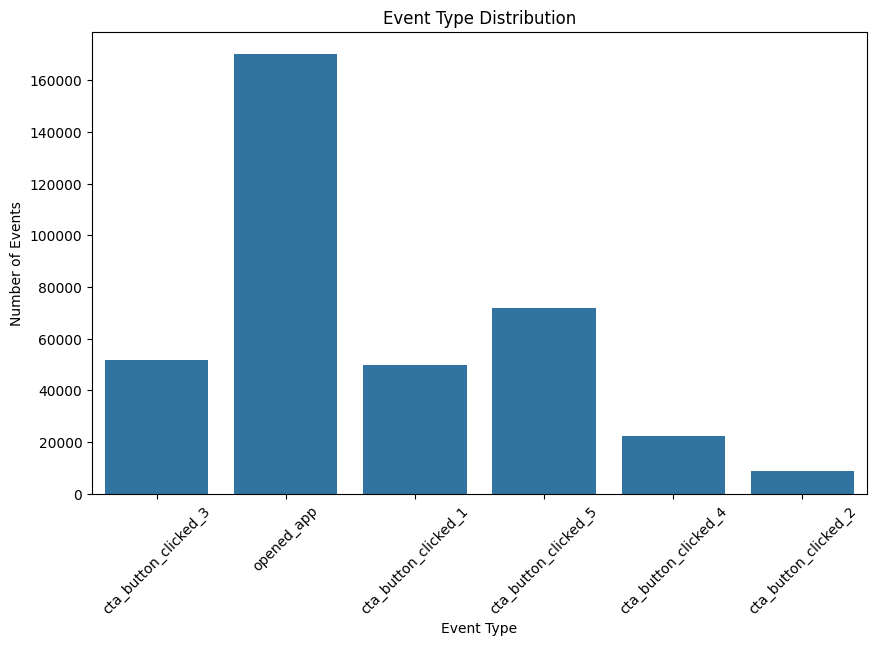

In [16]:
# Event type distribution
event_type_count = onboarding_df['event'].value_counts()
print("Event Type Distribution:\n", event_type_count)

plt.figure(figsize=(10, 6))
sns.countplot(data=onboarding_df, x='event')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

# Conversion Rates

Conversion Rates:
opened_app to cta_button_clicked_1: 29.24%
opened_app to cta_button_clicked_2: 5.24%
opened_app to cta_button_clicked_3: 30.32%
opened_app to cta_button_clicked_4: 13.17%
opened_app to cta_button_clicked_5: 42.25%


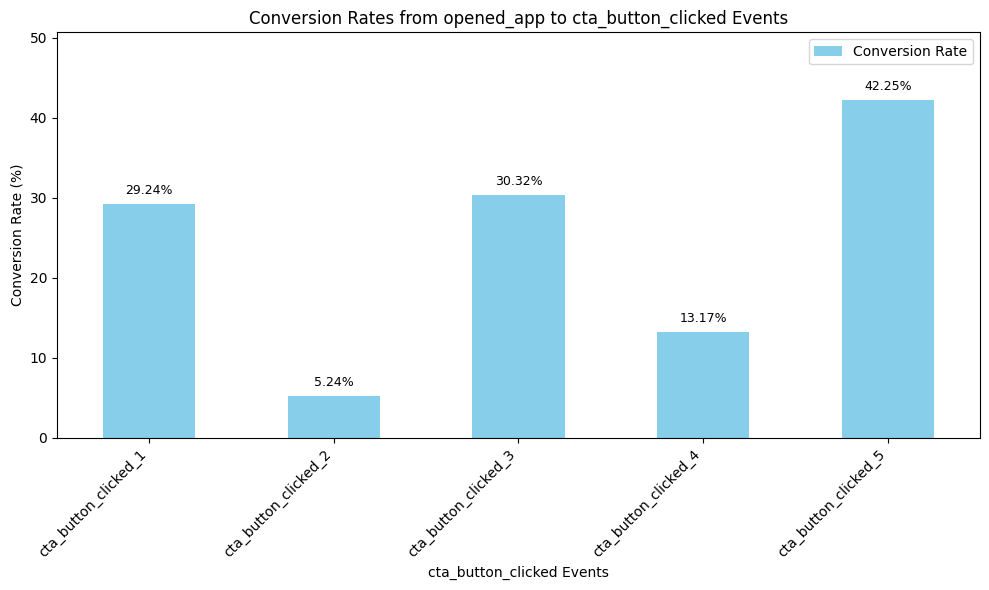

In [17]:
# Define the events to analyze
start_event = 'opened_app'
end_events = ['cta_button_clicked_1', 'cta_button_clicked_2', 'cta_button_clicked_3', 'cta_button_clicked_4', 'cta_button_clicked_5']

# Initialize a dictionary to store conversion rates
conversion_rates = {}

# Calculate conversion rates
for end_event in end_events:
    # Count occurrences of start and end events
    start_count = (onboarding_df['event'] == start_event).sum()
    end_count = (onboarding_df['event'] == end_event).sum()
    conversion_rate = (end_count / start_count) * 100  # Convert to percentage
    conversion_rates[end_event] = conversion_rate

# Display conversion rates
print("Conversion Rates:")
for end_event, rate in conversion_rates.items():
    print(f"{start_event} to {end_event}: {rate:.2f}%")

# Convert conversion_rates dictionary to a DataFrame for easier plotting
conversion_df = pd.DataFrame.from_dict(conversion_rates, orient='index', columns=['Conversion Rate'])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot conversion rates
conversion_df.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Conversion Rates from opened_app to cta_button_clicked Events')
ax.set_xlabel('cta_button_clicked Events')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust y-axis limits for better visibility of labels
ax.set_ylim(0, conversion_df['Conversion Rate'].max() * 1.2)

plt.tight_layout()
plt.show()

Inconsistent Conversion Rates: There are fluctuations in the conversion rates for 'cta_button_clicked_3' and 'cta_button_clicked_5' during specific periods, particularly starting from June 15 for 'cta_button_clicked_5' and from July 1 for 'cta_button_clicked_3'.

Potential Issues or Changes: These fluctuations could indicate potential issues or changes in the user experience or product functionality associated with those buttons. It's worth investigating whether there were any updates or modifications made to the app around these dates that could have affected user behavior.

Impact on User Engagement: The fluctuations in conversion rates may have implications for user engagement and the effectiveness of the onboarding process. Understanding the reasons behind these fluctuations is crucial for optimizing the onboarding flow and improving conversion rates.

Further Analysis Needed: To gain deeper insights into the factors influencing these fluctuations, additional analysis may be necessary. This could include examining user feedback, conducting A/B testing, or analyzing user demographics to identify any patterns or correlations.

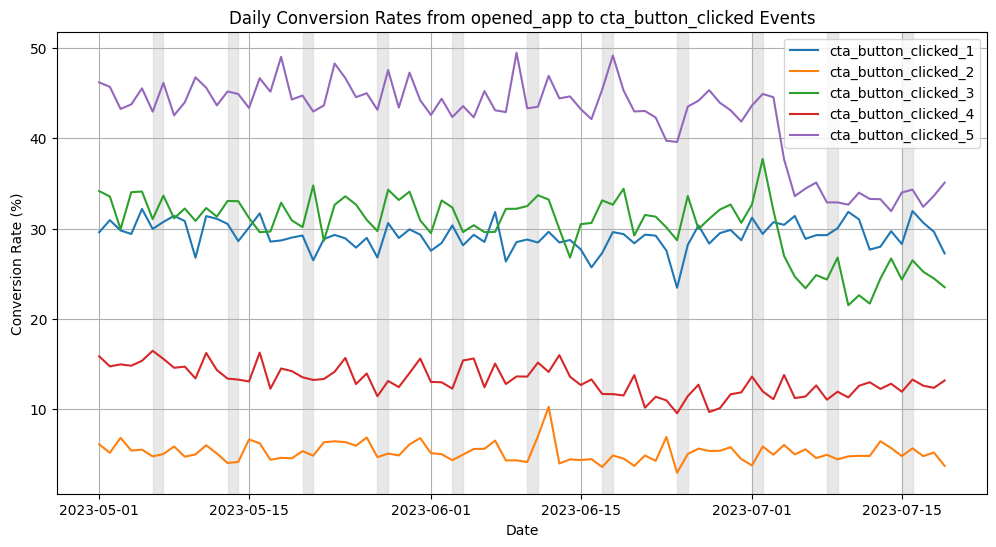

Daily Conversion Rates:
            cta_button_clicked_1  cta_button_clicked_2  cta_button_clicked_3  \
event time                                                                     
2023-05-01             29.591837              6.122449             34.141156   
2023-05-02             30.922931              5.185538             33.539486   
2023-05-03             29.786223              6.840855             29.928741   
2023-05-04             29.394950              5.431158             34.016198   
2023-05-05             32.164032              5.533597             34.090909   
...                          ...                   ...                   ...   
2023-07-15             28.287037              4.814815             24.351852   
2023-07-16             31.932021              5.679785             26.475850   
2023-07-17             30.647986              4.816112             25.218914   
2023-07-18             29.632986              5.210693             24.467603   
2023-07-19      

In [18]:
import numpy as np

# Group the data by date and event
daily_events = onboarding_df.set_index('event time').groupby([pd.Grouper(freq='D'), 'event']).size().unstack(fill_value=0)

# Calculate the conversion rates for each end event
daily_conversion_rates = {}
for end_event in end_events:
    start_count = daily_events['opened_app']
    end_count = daily_events[end_event]
    conversion_rate = (end_count / start_count) * 100
    daily_conversion_rates[end_event] = conversion_rate

# Convert daily conversion rates dictionary to a DataFrame
daily_conversion_df = pd.DataFrame(daily_conversion_rates)

# Plot the daily conversion rates over time
plt.figure(figsize=(12, 6))
for end_event in end_events:
    plt.plot(daily_conversion_df.index, daily_conversion_df[end_event], label=end_event)

# Highlight weekends in the background (starting from Monday)
weekend_indices = np.where(daily_conversion_df.index.weekday >= 5)[0]
for i in range(0, len(weekend_indices), 2):
    plt.axvspan(daily_conversion_df.index[weekend_indices[i]], daily_conversion_df.index[weekend_indices[i+1]], color='lightgrey', alpha=0.5)

plt.title('Daily Conversion Rates from opened_app to cta_button_clicked Events')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Display text output
print("Daily Conversion Rates:")
print(daily_conversion_df)

The funnel analysis reveals notable drop-offs in user engagement at specific steps. While a significant number of users (133,788) open the app, there is a substantial decrease in engagement at subsequent steps. Despite a considerable number of users (37,242) clicking on the first call-to-action (CTA) button, there is a drastic drop-off in engagement at the second CTA button (6,436). Similarly, although a substantial number of users (34,321) engage with the third CTA button, there is a significant decline in engagement at the fourth CTA button (15,436). These findings suggest potential issues or barriers preventing users from progressing through the funnel, particularly at steps involving the second and fourth CTA buttons, warranting further investigation and optimization efforts to improve conversion rates.

Number of Users at Each Step of the Funnel:
                       Users
opened_app            133788
cta_button_clicked_1   37242
cta_button_clicked_2    6436
cta_button_clicked_3   34321
cta_button_clicked_4   15436
cta_button_clicked_5   52766


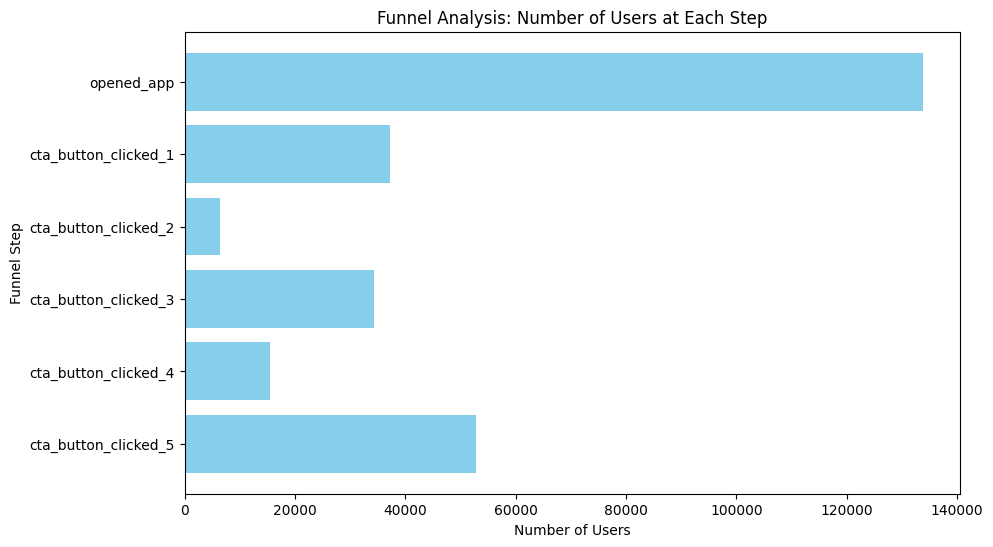

In [19]:
# Define the steps of the funnel
funnel_steps = ['opened_app', 'cta_button_clicked_1', 'cta_button_clicked_2', 'cta_button_clicked_3', 'cta_button_clicked_4', 'cta_button_clicked_5']

# Initialize a dictionary to store the number of users at each step of the funnel
funnel_counts = {}

# Calculate the number of users who performed each step of the funnel
for step in funnel_steps:
    users_at_step = onboarding_df[onboarding_df['event'] == step]['user id'].nunique()
    funnel_counts[step] = users_at_step

# Convert the dictionary to a DataFrame for visualization
funnel_df = pd.DataFrame.from_dict(funnel_counts, orient='index', columns=['Users'])

# Display the number of users at each step of the funnel
print("Number of Users at Each Step of the Funnel:")
print(funnel_df)

# Sort the funnel DataFrame by the order of the steps
funnel_df_sorted = funnel_df.loc[funnel_steps]

# Plot the funnel
plt.figure(figsize=(10, 6))
plt.barh(funnel_df_sorted.index, funnel_df_sorted['Users'], color='skyblue')
plt.xlabel('Number of Users')
plt.ylabel('Funnel Step')
plt.title('Funnel Analysis: Number of Users at Each Step')
plt.gca().invert_yaxis()  # Invert y-axis to display steps in correct order
plt.show()

In the segmentation analysis based on user distribution by platform and subscription, several trends emerge. Platform 1 has the highest user base across all subscription types, with sub_a being the most popular among its subscribers. Platform 2 and Platform 3 follow a similar pattern, with sub_b having a larger user base compared to other subscription types. Platform 4 also shows a considerable user base, with sub_b being the most prevalent among its subscribers. However, Platform 5 stands out as the lowest among all platforms in terms of user distribution, with a notably small number of subscribers across all subscription types, indicating potential areas for improvement in user acquisition or retention strategies.

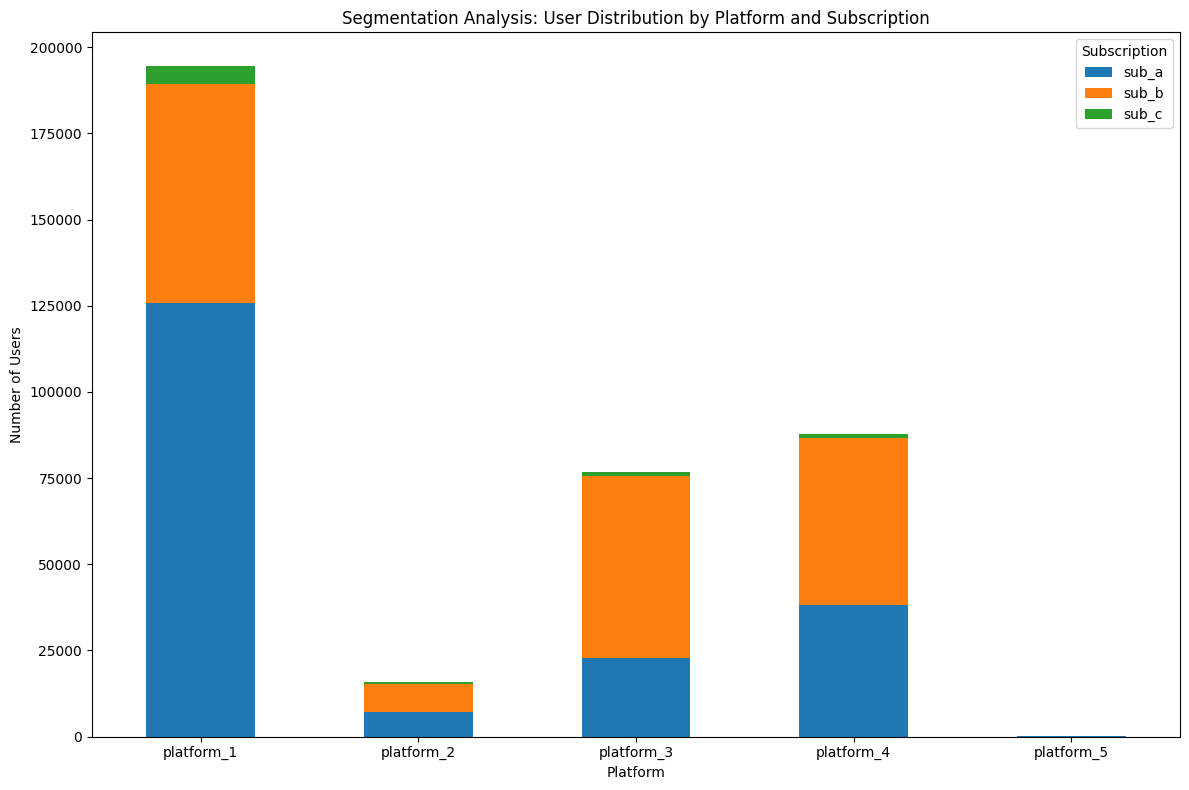

Segmentation Analysis: User Distribution by Platform and Subscription:
subscription   sub_a  sub_b  sub_c
platform                          
platform_1    125843  63641   5135
platform_2      7162   8061    511
platform_3     22715  52832   1138
platform_4     38129  48504   1035
platform_5        28     19      0


In [20]:
# Group the data by platform and subscription
segmentation_df = onboarding_df.groupby(['platform', 'subscription']).size().unstack(fill_value=0)

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the segmentation analysis
segmentation_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Segmentation Analysis: User Distribution by Platform and Subscription')
ax.set_xlabel('Platform')
ax.set_ylabel('Number of Users')
ax.legend(title='Subscription')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Display text output
print("Segmentation Analysis: User Distribution by Platform and Subscription:")
print(segmentation_df)

# Drop-off rates

Assuming that open app is the start and all other buttons are the buttons leading towards the goal.

After users open the app, there is a significant drop-off in engagement at each subsequent stage of the funnel. The drop-off rates indicate the percentage of users who disengage after completing each action. Notably, there is a high drop-off rate between the first and second CTA button clicks, suggesting a potential issue in user retention or engagement at this stage. Subsequent stages also experience considerable drop-off, albeit to a lesser extent. This analysis highlights areas of the user journey where improvements could be made to enhance user engagement and retention.

Funnel Counts:
opened_app: 133728
cta_button_clicked_1: 37122
cta_button_clicked_2: 6399
cta_button_clicked_3: 34239
cta_button_clicked_4: 15374
cta_button_clicked_5: 52681

Drop-off Rates:
cta_button_clicked_1: 72.24%
cta_button_clicked_2: 95.21%
cta_button_clicked_3: 74.40%
cta_button_clicked_4: 88.50%
cta_button_clicked_5: 60.61%


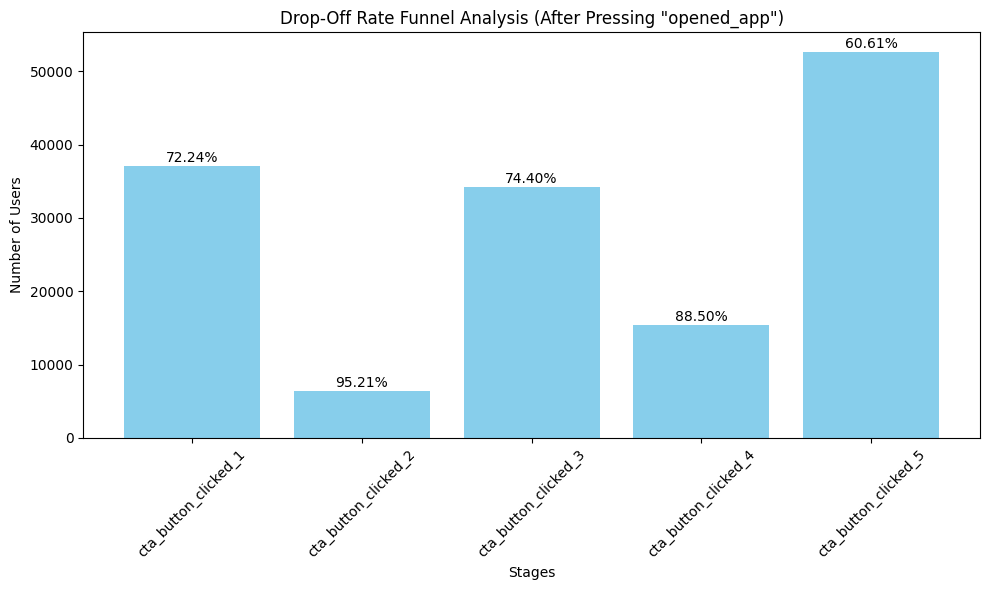

In [21]:
# Define the stages in the funnel
stages = ['opened_app', 'cta_button_clicked_1', 'cta_button_clicked_2', 'cta_button_clicked_3', 'cta_button_clicked_4', 'cta_button_clicked_5']

# Group events by user and collect them into lists
user_stages = onboarding_df.sort_values(by=['user id', 'event time']).groupby('user id')['event'].apply(list)

# Initialize a dictionary to store users at each stage
user_progression = {stage: set() for stage in stages}

# Initialize a set for users who completed the funnel correctly
completed_users = set()

# Initialize dictionary for drop-off rates
drop_off_rates = {}

# Track users through the funnel and calculate drop-off rates
for user_id, events in user_stages.items():
    completed_stage = None
    for i, event in enumerate(events):
        if event in stages:
            user_progression[event].add(user_id)
            if completed_stage is None:
                completed_stage = event
            elif stages.index(completed_stage) > stages.index(event):
                completed_users.add(user_id)
                break
                
    # Calculate drop-off rates for completed stages
    if completed_stage is not None:
        total_users_first_stage = len(user_progression[stages[0]])
        for stage in stages[1:]:
            if stage in user_progression and stage not in completed_users:
                drop_off = len(user_progression[completed_stage]) - len(user_progression[stage])
                if total_users_first_stage != 0:
                    drop_off_rate = (drop_off / total_users_first_stage) * 100
                else:
                    drop_off_rate = 0
                drop_off_rates[stage] = drop_off_rate

# Print funnel counts
print("Funnel Counts:")
for stage, count in user_progression.items():
    print(f"{stage}: {len(count)}")

# Print drop-off rates
print("\nDrop-off Rates:")
for stage, drop_off_rate in drop_off_rates.items():
    print(f"{stage}: {drop_off_rate:.2f}%")

# Define the stages and their corresponding counts
stages = list(user_progression.keys())[1:]  # Exclude the 'opened_app' stage
counts = [len(users) for users in user_progression.values()][1:]  # Exclude the count for 'opened_app'

# Create a bar chart for the counts
plt.figure(figsize=(10, 6))
plt.bar(range(len(stages)), counts, color='skyblue')
plt.xticks(range(len(stages)), stages, rotation=45)
plt.xlabel('Stages')
plt.ylabel('Number of Users')
plt.title('Drop-Off Rate Funnel Analysis (After Pressing "opened_app")')

# Add text annotations for drop-off rates
for i in range(len(stages)):
    plt.text(i, counts[i] + 0.01 * max(counts), f'{drop_off_rates[stages[i]]:.2f}%', ha='center')  

# Show plot
plt.tight_layout()
plt.show()

How many user % would end up in the last stage if we say that they should start from app open and end up at cta_button_clicked_5 (assuming clicking through all buttons till reaching end goal)

What if user does this not linear manner onboarding but can press any button after app open?

------

Daily Event Counts: The number of events fluctuates over time, showing peaks and valleys. This indicates variations in user activity levels on different days.

Daily Active Users (DAU): The number of daily active users also varies over time. We can see fluctuations in the number of users engaging with the platform on a daily basis.

Average Events per User per Day: The average number of events per user per day provides an indication of user engagement intensity. We can see how this metric changes over time, which reflects changes in user behavior and interaction with the platform.

By analyzing these metrics, we can identify trends, patterns, and anomalies in user activity over time. For example, sudden spikes or drops in event counts or DAU could indicate external factors such as marketing campaigns, product updates, or seasonal trends impacting user engagement. Similarly, changes in the average events per user per day could highlight shifts in user behavior or usage patterns. Overall, these analyses help us understand user engagement dynamics and inform decision-making processes aimed at optimizing user experience and platform performance.

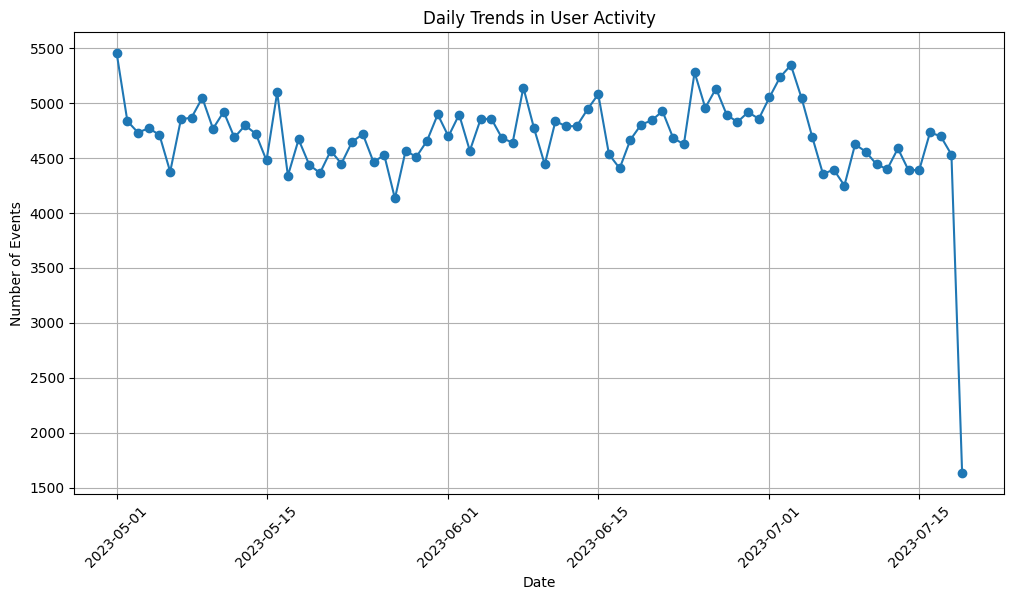

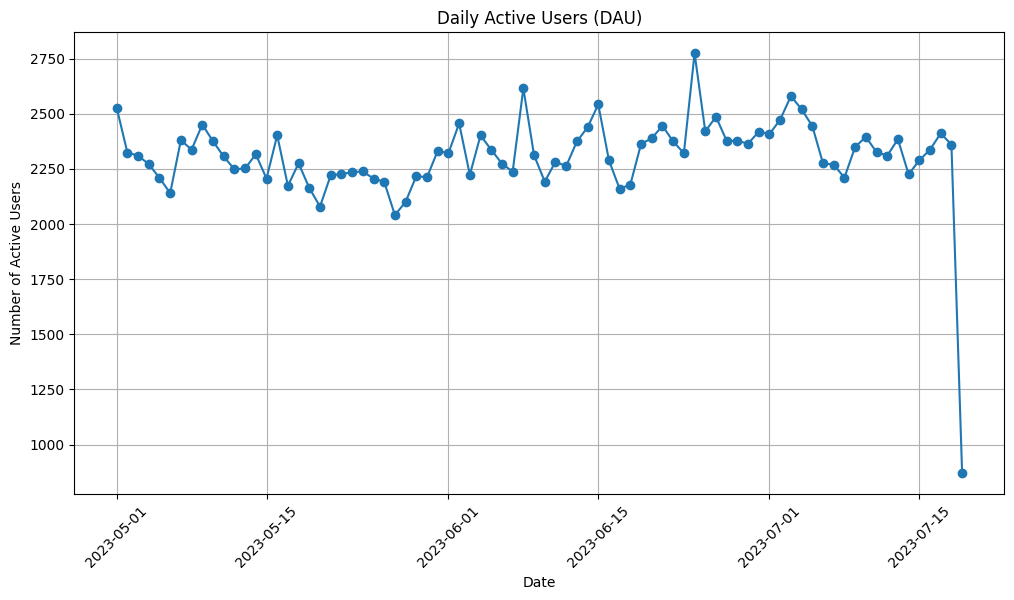

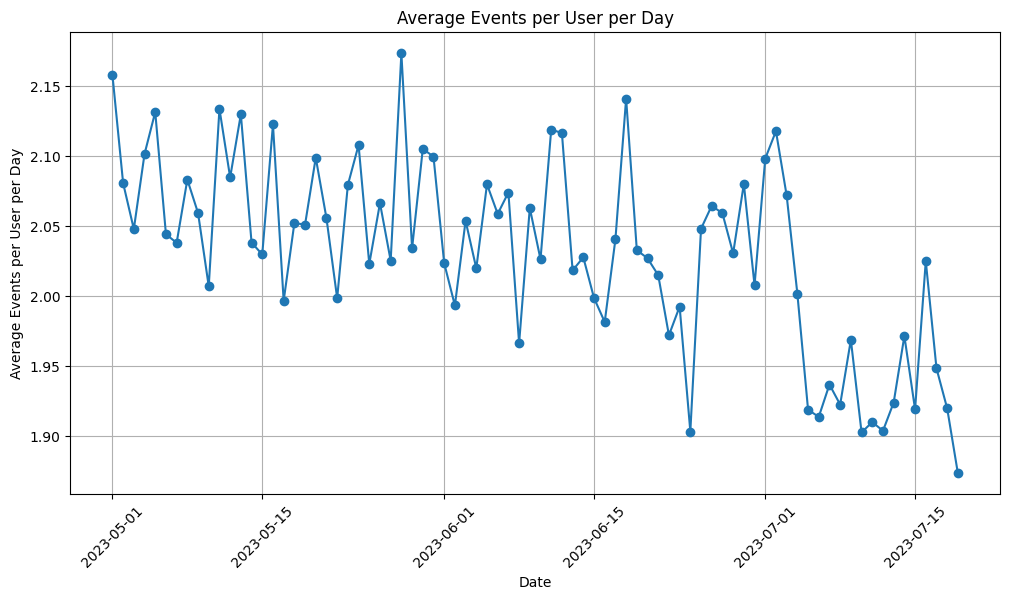

Daily Event Counts:
 event time
2023-05-01    5454
2023-05-02    4836
2023-05-03    4731
2023-05-04    4773
2023-05-05    4709
              ... 
2023-07-15    4393
2023-07-16    4733
2023-07-17    4698
2023-07-18    4531
2023-07-19    1630
Freq: D, Length: 80, dtype: int64

Daily Active Users (DAU):
 event time
2023-05-01    2527
2023-05-02    2324
2023-05-03    2310
2023-05-04    2271
2023-05-05    2209
              ... 
2023-07-15    2289
2023-07-16    2337
2023-07-17    2411
2023-07-18    2360
2023-07-19     870
Freq: D, Name: user id, Length: 80, dtype: int64

Average Events per User per Day:
 event time
2023-05-01    2.158290
2023-05-02    2.080895
2023-05-03    2.048052
2023-05-04    2.101717
2023-05-05    2.131734
                ...   
2023-07-15    1.919179
2023-07-16    2.025246
2023-07-17    1.948569
2023-07-18    1.919915
2023-07-19    1.873563
Freq: D, Length: 80, dtype: float64


In [22]:
# Calculate daily event counts
daily_event_counts = onboarding_df.resample('D', on='event time').size()

# Calculate daily active users (DAU)
daily_active_users = onboarding_df.resample('D', on='event time')['user id'].nunique()

# Calculate average events per user per day
avg_events_per_user_per_day = daily_event_counts / daily_active_users

# Plot daily trends in user activity
plt.figure(figsize=(12, 6))
plt.plot(daily_event_counts.index, daily_event_counts, marker='o', linestyle='-')
plt.title('Daily Trends in User Activity')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot daily active users
plt.figure(figsize=(12, 6))
plt.plot(daily_active_users.index, daily_active_users, marker='o', linestyle='-')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot average events per user per day
plt.figure(figsize=(12, 6))
plt.plot(avg_events_per_user_per_day.index, avg_events_per_user_per_day, marker='o', linestyle='-')
plt.title('Average Events per User per Day')
plt.xlabel('Date')
plt.ylabel('Average Events per User per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Display text output
print("Daily Event Counts:\n", daily_event_counts)
print("\nDaily Active Users (DAU):\n", daily_active_users)
print("\nAverage Events per User per Day:\n", avg_events_per_user_per_day)

These retention rates represent the percentage of users who returned to the app on each subsequent day after their initial interaction. As we can see, there is a gradual decline in retention rates over time, which is typical in many user retention scenarios. This information provides insights into how well the product retains its users over the first week after their initial interaction. 

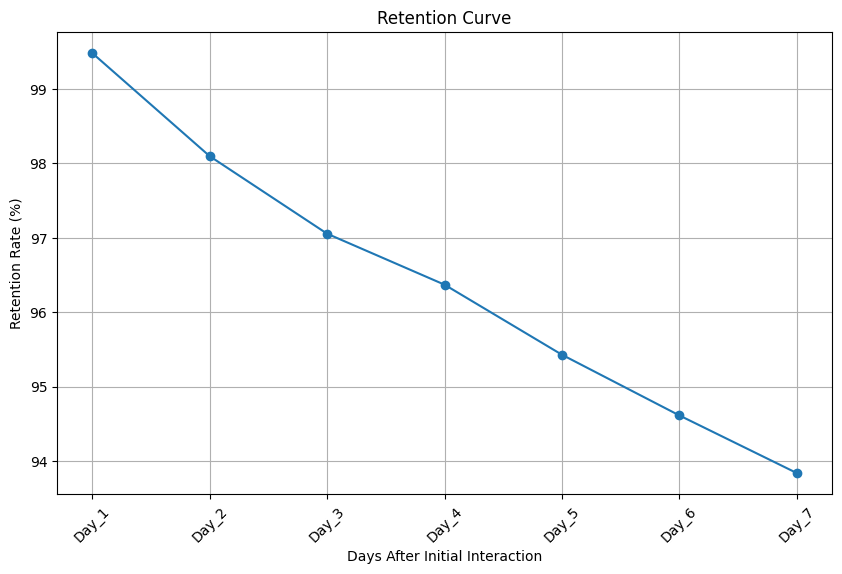

Retention Rates:
       Retention Rate
Day_1       99.483877
Day_2       98.098238
Day_3       97.056215
Day_4       96.371078
Day_5       95.429625
Day_6       94.613886
Day_7       93.839352


In [23]:
# Define the cohort based on the date when users first opened the app
cohort = onboarding_df.groupby('user id')['event time'].min().dt.date

# Calculate retention rates for each day after the initial interaction
retention_rates = {}
for i in range(1, 8):  # Calculate retention for the first 7 days after the initial interaction
    retention_rates[f'Day_{i}'] = (cohort + pd.Timedelta(days=i)).isin(onboarding_df['event time'].dt.date).mean() * 100

# Convert retention rates dictionary to a DataFrame for easier plotting
retention_df = pd.DataFrame.from_dict(retention_rates, orient='index', columns=['Retention Rate'])

# Plot the retention curve
plt.figure(figsize=(10, 6))
plt.plot(retention_df.index, retention_df['Retention Rate'], marker='o')
plt.title('Retention Curve')
plt.xlabel('Days After Initial Interaction')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Display text output
print("Retention Rates:")
print(retention_df)

---


The retention analysis reveals that sub_c is performing exceptionally well in retaining users, while sub_a and sub_b have similar but slightly lower retention rates. Understanding and leveraging the factors that contribute to the high retention of sub_c can help improve the overall retention strategy for the app. Implementing targeted engagement strategies for sub_a and sub_b could help mitigate the gradual decline in retention.

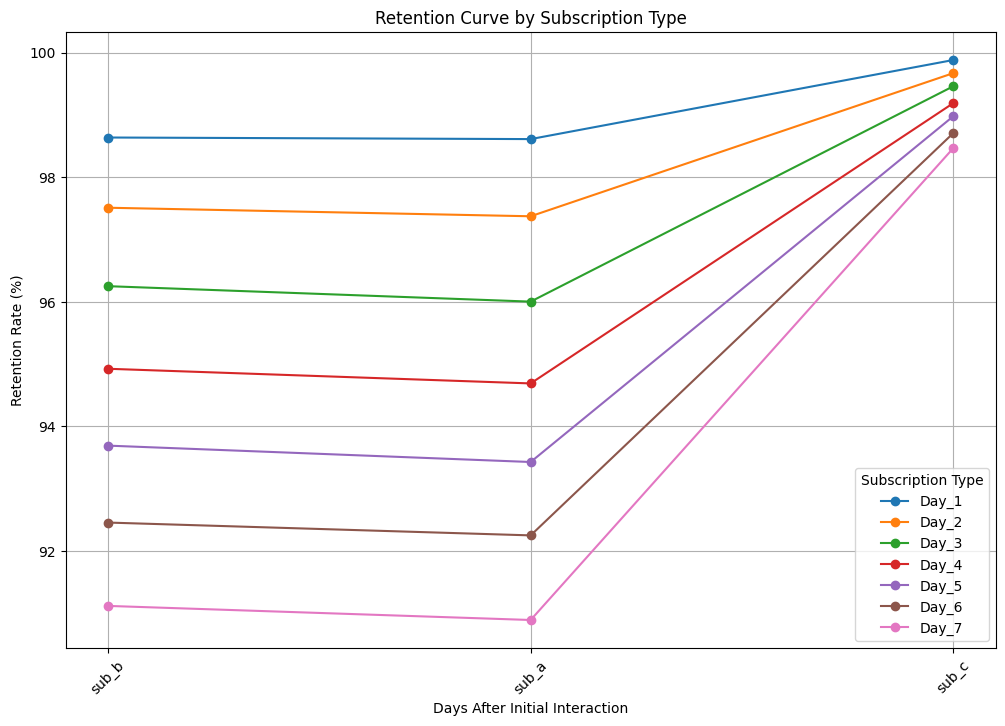

Retention Rates by Subscription Type:
           Day_1      Day_2      Day_3      Day_4      Day_5      Day_6  \
sub_b  98.635544  97.508384  96.249258  94.923544  93.689843  92.454932   
sub_a  98.610117  97.371280  96.001272  94.688237  93.426875  92.248986   
sub_c  99.879735  99.669272  99.458809  99.188214  98.977751  98.707156   

           Day_7  
sub_b  91.117111  
sub_a  90.890903  
sub_c  98.466627  


In [24]:
# Define the cohort based on the date when users first opened the app
onboarding_df['first_open_date'] = onboarding_df.groupby('user id')['event time'].transform('min').dt.date

# Calculate retention rates for each subscription type
subscription_types = onboarding_df['subscription'].unique()
retention_rates = {subscription: {} for subscription in subscription_types}

for subscription in subscription_types:
    cohort = onboarding_df[onboarding_df['subscription'] == subscription].groupby('user id')['first_open_date'].first()
    for i in range(1, 8):  # Calculate retention for the first 7 days after the initial interaction
        retention_date = cohort + pd.Timedelta(days=i)
        active_users = onboarding_df[(onboarding_df['subscription'] == subscription) & (onboarding_df['event time'].dt.date.isin(retention_date))]['user id'].unique()
        retention_rate = (len(active_users) / len(cohort)) * 100 if len(cohort) > 0 else 0
        retention_rates[subscription][f'Day_{i}'] = retention_rate

# Convert retention rates dictionary to a DataFrame for easier plotting
retention_df = pd.DataFrame(retention_rates).T

# Plot the retention curves for each subscription type
plt.figure(figsize=(12, 8))
for subscription in retention_df.columns:
    plt.plot(retention_df.index, retention_df[subscription], marker='o', label=subscription)

plt.title('Retention Curve by Subscription Type')
plt.xlabel('Days After Initial Interaction')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.grid(True)
plt.show()

# Display text output
print("Retention Rates by Subscription Type:")
print(retention_df)


The data on daily event counts, daily active users (DAU), and average events per user per day by subscription type reveals distinct patterns and insights. Subscriptions sub_a and sub_b have higher daily event counts, indicating a broader user base or more frequent engagement. For example, on May 1, 2023, sub_a recorded 2976 events and sub_b recorded 2473 events, compared to only 5 events for sub_c. This trend continues throughout the observed period, with sub_a and sub_b maintaining higher activity levels.

When analyzing DAU, both sub_a and sub_b consistently show higher numbers. For instance, on May 1, 2023, sub_a had 1321 active users and sub_b had 1316 active users, while sub_c had only 4 active users. This pattern persists, highlighting the larger and more consistently active user base of sub_a and sub_b.

Average events per user per day also show that sub_c users, despite being fewer, are highly engaged. For example, on May 1, 2023, sub_a users averaged 2.25 events, sub_b users averaged 1.88 events, and sub_c users averaged 1.25 events. However, on July 15, 2023, sub_c users had a higher average of 2.15 events per user, compared to sub_a's 2.02 and sub_b's 1.66. This indicates that sub_c users, though smaller in number, tend to be more active when they do engage.

Overall, sub_a and sub_b have a broader user base with consistent daily activity, but sub_c users demonstrate higher engagement and retention. This suggests that sub_c may represent a more loyal or high-value user segment. Efforts to enhance user engagement and reduce drop-offs in sub_a and sub_b could further optimize user activity across all subscription types.

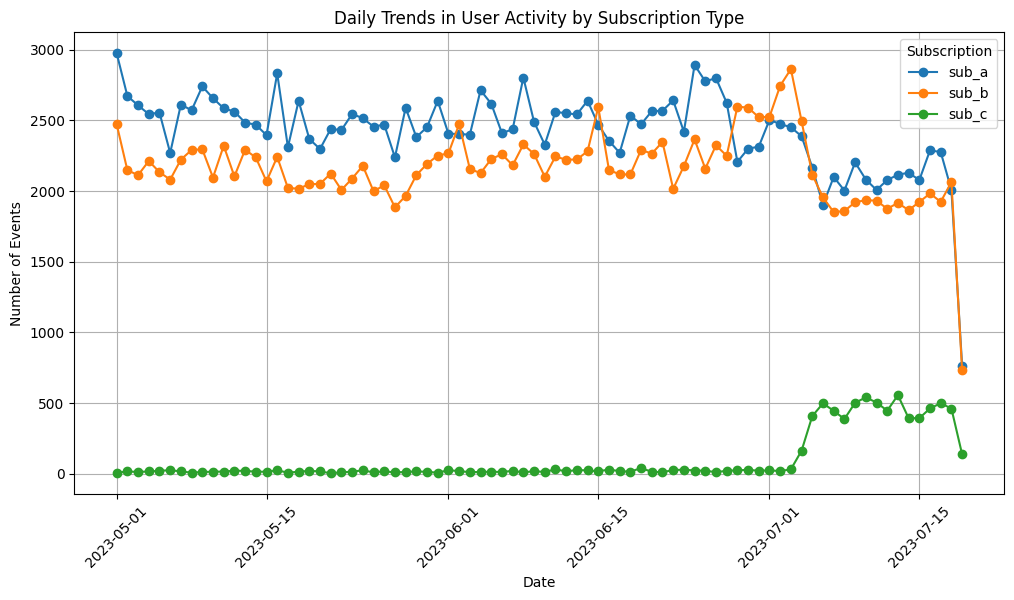

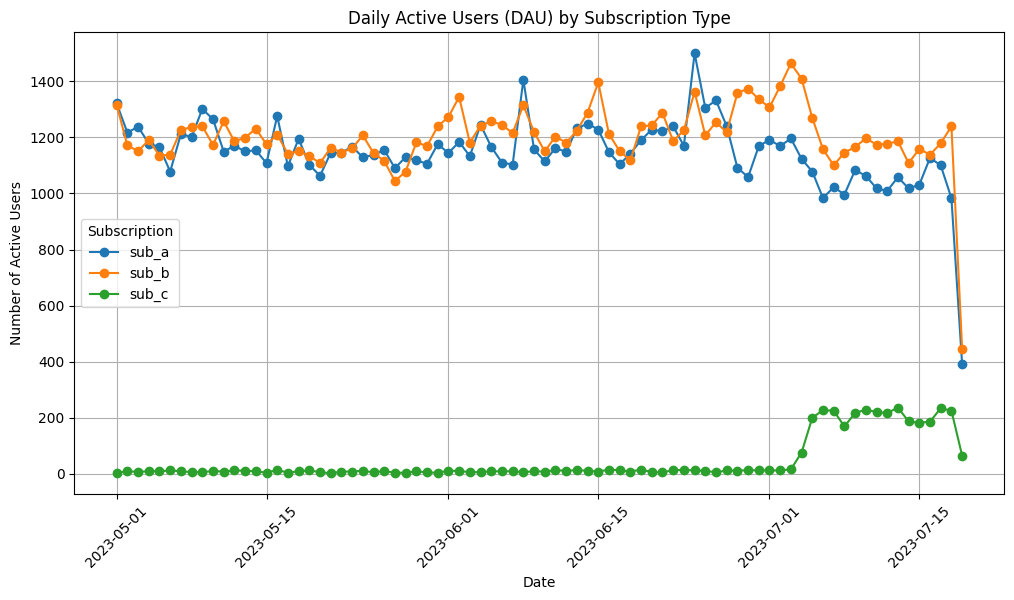

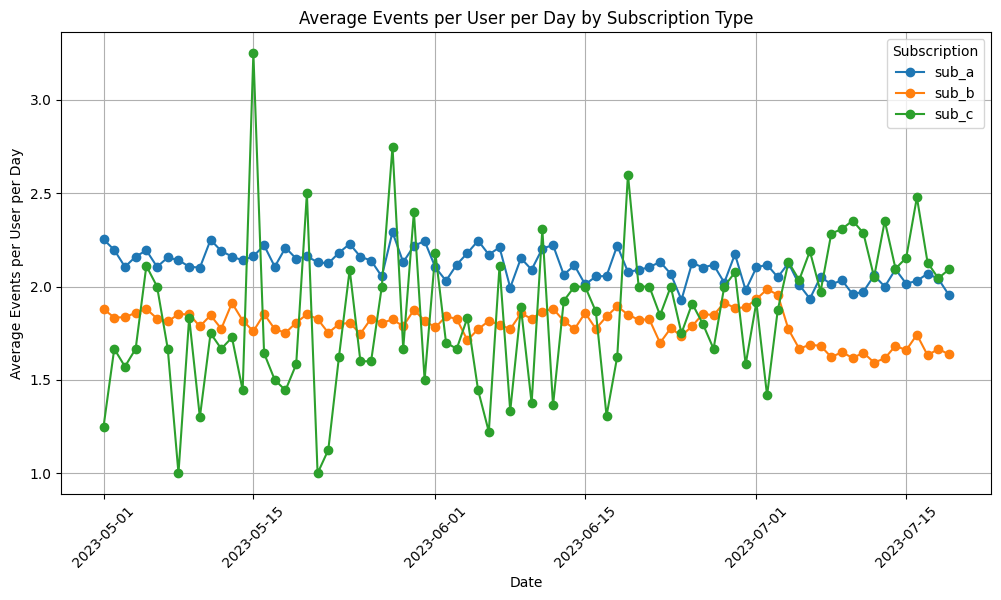

Daily Event Counts by Subscription Type:
 event time    2023-05-01  2023-05-02  2023-05-03  2023-05-04  2023-05-05  \
subscription                                                               
sub_a               2976        2673        2607        2545        2556   
sub_b               2473        2148        2113        2213        2134   
sub_c                  5          15          11          15          19   

event time    2023-05-06  2023-05-07  2023-05-08  2023-05-09  2023-05-10  ...  \
subscription                                                              ...   
sub_a               2270        2613        2572        2741        2658  ...   
sub_b               2081        2223        2291        2296        2096  ...   
sub_c                 24          15           6          11          13  ...   

event time    2023-07-10  2023-07-11  2023-07-12  2023-07-13  2023-07-14  \
subscription                                                               
sub_a              

In [25]:
# Calculate daily event counts, DAU, and average events per user per day by subscription type
daily_event_counts = onboarding_df.groupby('subscription').resample('D', on='event time').size().unstack(fill_value=0)
daily_active_users = onboarding_df.groupby('subscription').resample('D', on='event time')['user id'].nunique().unstack(fill_value=0)
avg_events_per_user_per_day = daily_event_counts / daily_active_users

# Plot daily trends in user activity by subscription type
plt.figure(figsize=(12, 6))
for sub in daily_event_counts.index:
    plt.plot(daily_event_counts.columns, daily_event_counts.loc[sub], marker='o', linestyle='-', label=sub)
plt.title('Daily Trends in User Activity by Subscription Type')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.grid(True)
plt.show()

# Plot daily active users by subscription type
plt.figure(figsize=(12, 6))
for sub in daily_active_users.index:
    plt.plot(daily_active_users.columns, daily_active_users.loc[sub], marker='o', linestyle='-', label=sub)
plt.title('Daily Active Users (DAU) by Subscription Type')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.grid(True)
plt.show()

# Plot average events per user per day by subscription type
plt.figure(figsize=(12, 6))
for sub in avg_events_per_user_per_day.index:
    plt.plot(avg_events_per_user_per_day.columns, avg_events_per_user_per_day.loc[sub], marker='o', linestyle='-', label=sub)
plt.title('Average Events per User per Day by Subscription Type')
plt.xlabel('Date')
plt.ylabel('Average Events per User per Day')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.grid(True)
plt.show()

# Display text output
print("Daily Event Counts by Subscription Type:\n", daily_event_counts)
print("\nDaily Active Users (DAU) by Subscription Type:\n", daily_active_users)
print("\nAverage Events per User per Day by Subscription Type:\n", avg_events_per_user_per_day)

Conversion rate % indicates that there are significant problems with the activity of the button 2 and 4.
These buttons needs to be investigated further, used internally to outline critical bugs happening in the product that affects all subcription users so as retention for all of them.
We could improve this by performing A/B testing. Testing out new visability features, making new button designs, changing placeholders or even getting rid of it if this is not used by most.
It is hard to tell what these buttons do without actual naming, this could be one time buttons, set it and leave it. For example automating something and so on.

Conversion Rates by Subscription Type:

Subscription: sub_b
opened_app to cta_button_clicked_1: 17.07%
opened_app to cta_button_clicked_2: 3.19%
opened_app to cta_button_clicked_3: 25.20%
opened_app to cta_button_clicked_4: 7.04%
opened_app to cta_button_clicked_5: 35.46%

Subscription: sub_a
opened_app to cta_button_clicked_1: 43.29%
opened_app to cta_button_clicked_2: 7.51%
opened_app to cta_button_clicked_3: 35.82%
opened_app to cta_button_clicked_4: 20.26%
opened_app to cta_button_clicked_5: 50.03%

Subscription: sub_c
opened_app to cta_button_clicked_1: 51.66%
opened_app to cta_button_clicked_2: 11.69%
opened_app to cta_button_clicked_3: 51.28%
opened_app to cta_button_clicked_4: 23.94%
opened_app to cta_button_clicked_5: 56.26%


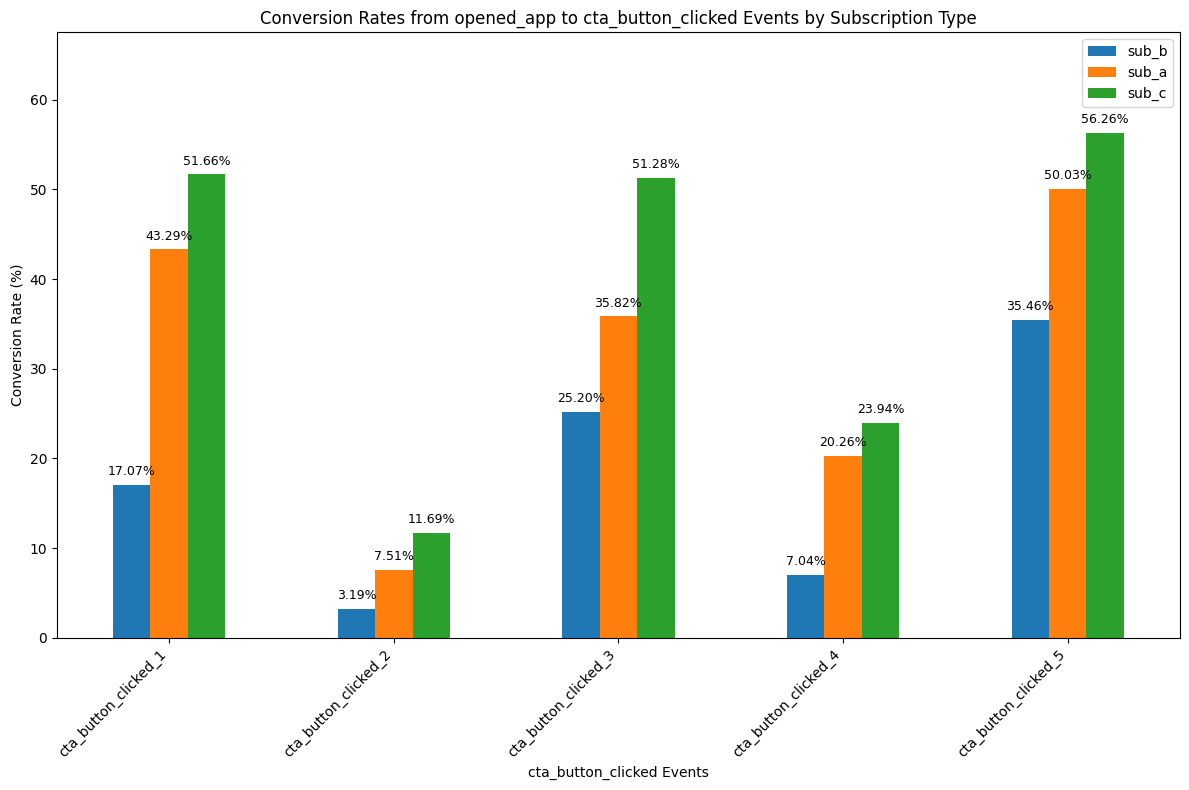

In [26]:
# Define the events to analyze
start_event = 'opened_app'
end_events = ['cta_button_clicked_1', 'cta_button_clicked_2', 'cta_button_clicked_3', 'cta_button_clicked_4', 'cta_button_clicked_5']

# Initialize a dictionary to store conversion rates by subscription
conversion_rates_by_subscription = {}

# Get unique subscription types
subscriptions = onboarding_df['subscription'].unique()

# Calculate conversion rates for each subscription type
for subscription in subscriptions:
    conversion_rates = {}
    for end_event in end_events:
        # Count occurrences of start and end events for the current subscription
        start_count = onboarding_df[(onboarding_df['event'] == start_event) & (onboarding_df['subscription'] == subscription)].shape[0]
        end_count = onboarding_df[(onboarding_df['event'] == end_event) & (onboarding_df['subscription'] == subscription)].shape[0]
        if start_count > 0:
            conversion_rate = (end_count / start_count) * 100  # Convert to percentage
        else:
            conversion_rate = 0
        conversion_rates[end_event] = conversion_rate
    conversion_rates_by_subscription[subscription] = conversion_rates

# Display conversion rates for each subscription
print("Conversion Rates by Subscription Type:")
for subscription, rates in conversion_rates_by_subscription.items():
    print(f"\nSubscription: {subscription}")
    for end_event, rate in rates.items():
        print(f"{start_event} to {end_event}: {rate:.2f}%")

# Convert conversion_rates_by_subscription to a DataFrame for easier plotting
conversion_df = pd.DataFrame(conversion_rates_by_subscription)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot conversion rates
conversion_df.plot(kind='bar', ax=ax)
ax.set_title('Conversion Rates from opened_app to cta_button_clicked Events by Subscription Type')
ax.set_xlabel('cta_button_clicked Events')
ax.set_ylabel('Conversion Rate (%)')
ax.set_xticklabels(conversion_df.index, rotation=45, ha='right')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust y-axis limits for better visibility of labels
ax.set_ylim(0, conversion_df.max().max() * 1.2)

plt.tight_layout()
plt.show()

As users progress through the funnel, significant disparities emerge between subscription types. For instance, at 'cta_button_clicked_1', sub_b exhibits the highest drop-off rate at 83.90%, followed by sub_a at 63.71% and sub_c at 59.85%.

Similar trends persist in subsequent stages, with sub_b consistently showing higher drop-off rates compared to sub_a and sub_c. Notably, at 'cta_button_clicked_2', sub_b experiences a substantial drop-off rate of 97.25%, indicating a critical point of attrition in user engagement.


Drop-off Rates by Subscription:

opened_app:
sub_b: Not available
sub_a: Not available
sub_c: Not available

cta_button_clicked_1:
sub_b: 83.90%
sub_a: 63.71%
sub_c: 59.85%

cta_button_clicked_2:
sub_b: 97.25%
sub_a: 94.06%
sub_c: 90.62%

cta_button_clicked_3:
sub_b: 79.22%
sub_a: 72.95%
sub_c: 65.23%

cta_button_clicked_4:
sub_b: 93.82%
sub_a: 84.83%
sub_c: 82.42%

cta_button_clicked_5:
sub_b: 68.71%
sub_a: 56.87%
sub_c: 54.35%


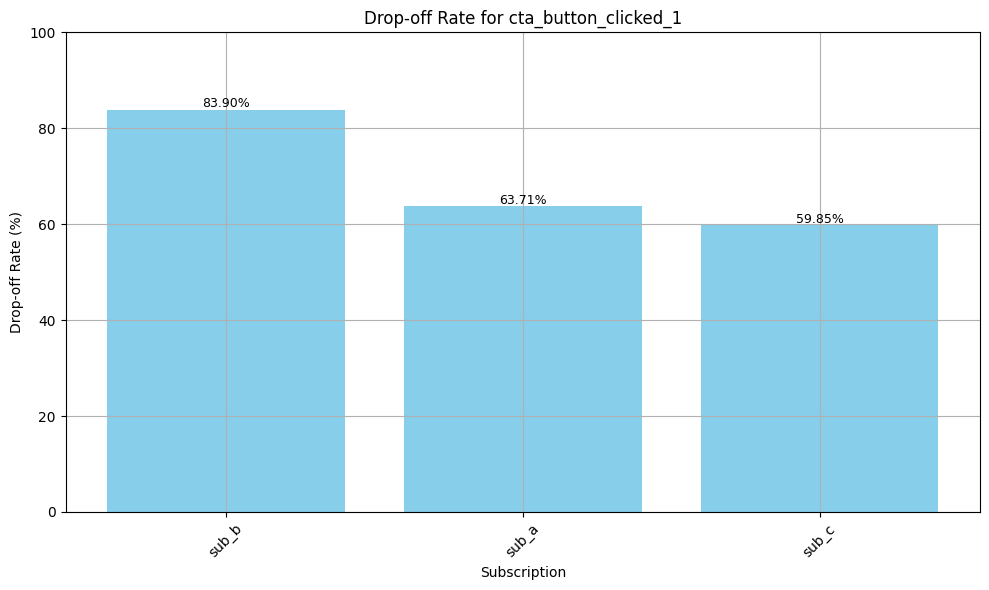

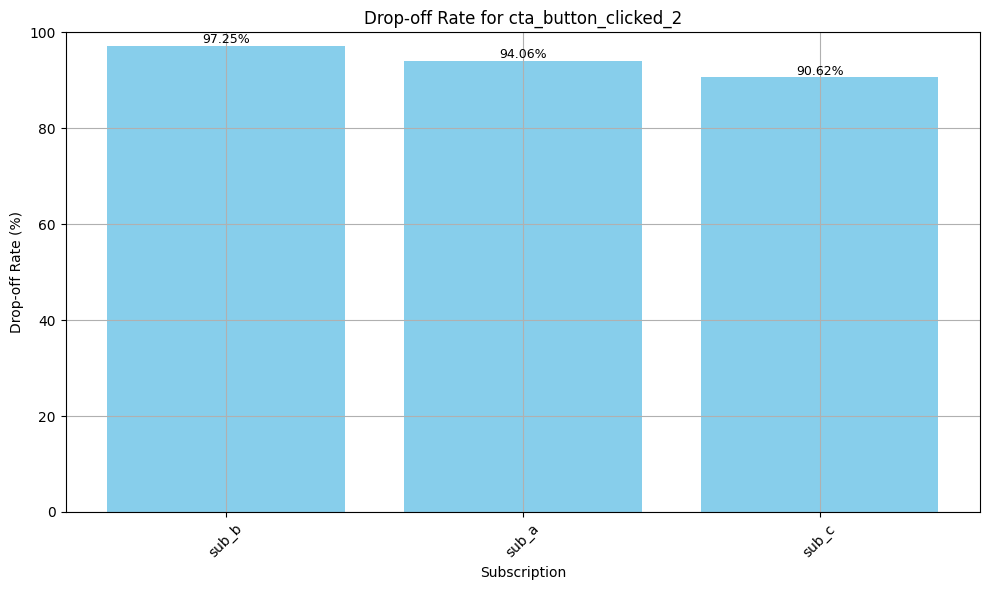

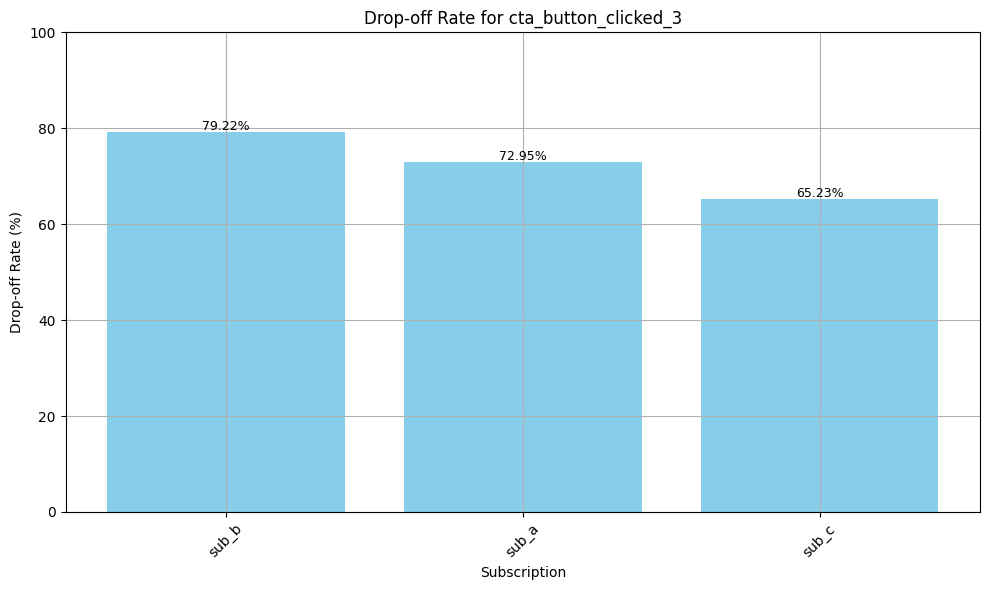

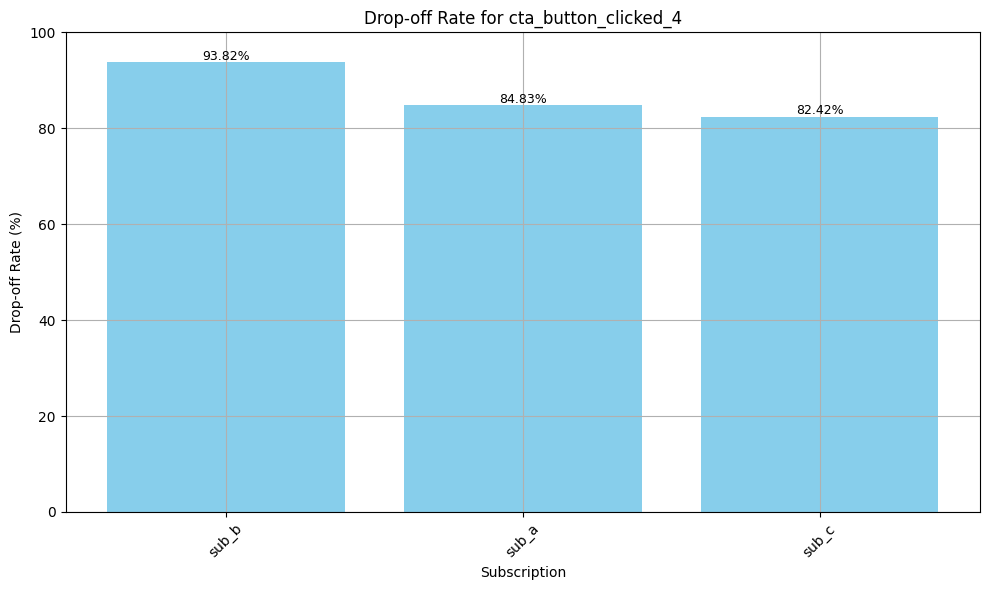

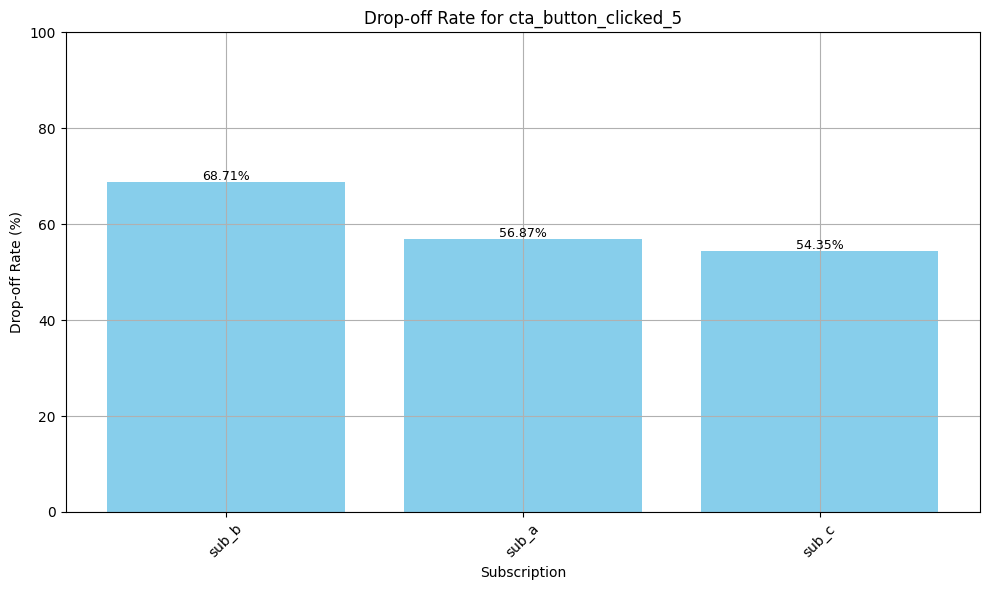

In [27]:
# Define the stages in the funnel
stages = ['opened_app', 'cta_button_clicked_1', 'cta_button_clicked_2', 'cta_button_clicked_3', 'cta_button_clicked_4', 'cta_button_clicked_5']

# Group events by user and collect them into lists
user_stages = onboarding_df.sort_values(by=['user id', 'event time']).groupby(['user id', 'subscription'])['event'].apply(list)

# Initialize dictionaries to store users at each stage and drop-off rates by subscription
user_progression = {stage: {sub: set() for sub in onboarding_df['subscription'].unique()} for stage in stages}
drop_off_rates = {stage: {sub: None for sub in onboarding_df['subscription'].unique()} for stage in stages}

# Track users through the funnel and calculate drop-off rates by subscription
for (user_id, subscription), events in user_stages.items():
    completed_stage = None
    for i, event in enumerate(events):
        if event in stages:
            user_progression[event][subscription].add(user_id)
            if completed_stage is None:
                completed_stage = event
            elif stages.index(completed_stage) > stages.index(event):
                break

# Calculate drop-off rates for each stage by subscription
for stage in stages[1:]:
    for subscription in onboarding_df['subscription'].unique():
        total_users_first_stage = len(user_progression[stages[0]][subscription])
        if stage in user_progression and stage not in completed_users:
            drop_off = len(user_progression[completed_stage][subscription]) - len(user_progression[stage][subscription])
            if total_users_first_stage != 0:
                drop_off_rate = (drop_off / total_users_first_stage) * 100
            else:
                drop_off_rate = 0
            drop_off_rates[stage][subscription] = drop_off_rate

# Print drop-off rates by subscription
print("\nDrop-off Rates by Subscription:")
for stage, rates in drop_off_rates.items():
    print(f"\n{stage}:")
    for subscription, rate in rates.items():
        if rate is not None:
            print(f"{subscription}: {rate:.2f}%")
        else:
            print(f"{subscription}: Not available")

# Define the stages and their corresponding drop-off rates by subscription
stages = list(user_progression.keys())[1:]  # Exclude the 'opened_app' stage

# Create bar charts for drop-off rates by subscription
for stage in stages:
    # Get drop-off rates for the current stage
    rates = drop_off_rates[stage]
    
    # Prepare data for plotting
    subscriptions = list(rates.keys())
    drop_off_rates_values = list(rates.values())
    
    # Plot the drop-off rates by subscription
    plt.figure(figsize=(10, 6))
    plt.bar(subscriptions, drop_off_rates_values, color='skyblue')
    plt.xlabel('Subscription')
    plt.ylabel('Drop-off Rate (%)')
    plt.title(f'Drop-off Rate for {stage}')
    plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Add labels to the bars
    for i in range(len(subscriptions)):
        plt.text(i, drop_off_rates_values[i] + 0.5, f'{drop_off_rates_values[i]:.2f}%', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

Among the subscription types, 'sub_c' on platform 4, 'sub_b' on platform 1, and 'sub_b' on platform 2 exhibit the highest retention rates, indicating successful user engagement strategies. However, 'sub_b' on platform 3 shows a declining retention trend, particularly evident on day 7, suggesting potential issues that require attention. Notably, 'sub_b' on platform 2 displays a recovery in retention by day 7, indicating positive platform adjustments. Across all subscriptions, 'sub_c' on platform 5 demonstrates the lowest retention rates, with 'sub_a' and 'sub_b' also performing poorly on this platform. This underscores the need for urgent investigation and remedial actions to enhance retention rates, especially for platform 5.

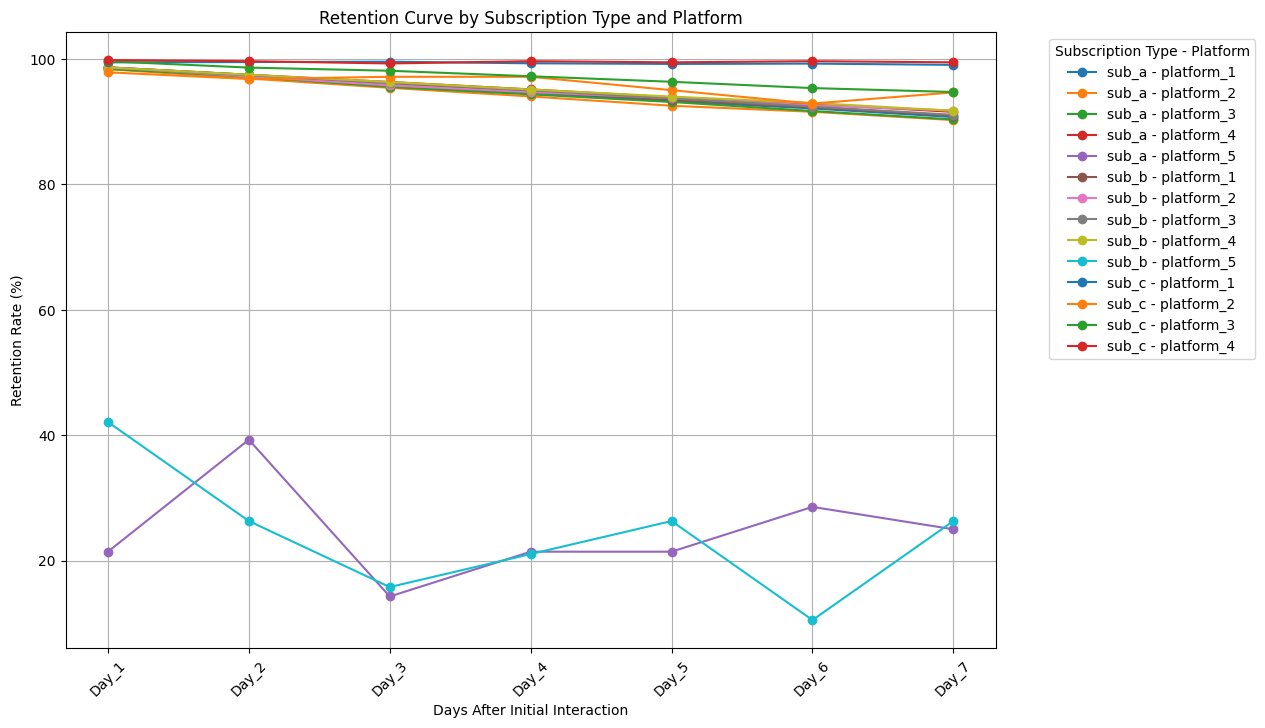

Retention Rates by Subscription Type and Platform:
   Subscription    Platform    Day  Retention Rate
0         sub_a  platform_1  Day_1       98.555569
1         sub_a  platform_1  Day_2       97.220503
2         sub_a  platform_1  Day_3       95.852420
3         sub_a  platform_1  Day_4       94.542115
4         sub_a  platform_1  Day_5       93.248318
..          ...         ...    ...             ...
93        sub_c  platform_4  Day_3       99.276673
94        sub_c  platform_4  Day_4       99.638336
95        sub_c  platform_4  Day_5       99.457505
96        sub_c  platform_4  Day_6       99.638336
97        sub_c  platform_4  Day_7       99.457505

[98 rows x 4 columns]


In [56]:
# Define the cohort based on the date when users first opened the app
onboarding_df['first_open_date'] = onboarding_df.groupby('user id')['event time'].transform('min').dt.date

# Initialize lists to store retention rates
retention_data = []

# Iterate over each subscription-platform combination
for (subscription, platform), data in onboarding_df.groupby(['subscription', 'platform']):
    # Calculate the cohort for the current combination
    cohort = data.groupby('user id')['first_open_date'].first()
    
    # Iterate over the first 7 days after the initial interaction
    for i in range(1, 8):
        retention_date = cohort + pd.Timedelta(days=i)
        active_users = data[data['event time'].dt.date.isin(retention_date)]['user id'].unique()
        retention_rate = (len(active_users) / len(cohort)) * 100 if len(cohort) > 0 else 0
        
        # Append the retention rate to the list
        retention_data.append({
            'Subscription': subscription,
            'Platform': platform,
            'Day': f'Day_{i}',
            'Retention Rate': retention_rate
        })

# Create a DataFrame from the list of retention rates
retention_df = pd.DataFrame(retention_data)

# Plot the retention curves for each subscription type and platform
plt.figure(figsize=(12, 8))
for subscription_platform, data in retention_df.groupby(['Subscription', 'Platform']):
    plt.plot(data['Day'], data['Retention Rate'], marker='o', label=f"{subscription_platform[0]} - {subscription_platform[1]}")

plt.title('Retention Curve by Subscription Type and Platform')
plt.xlabel('Days After Initial Interaction')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type - Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Display text output
print("Retention Rates by Subscription Type and Platform:")
print(retention_df)


Among the platforms, platform_1, platform_3, and platform_4 have the highest user counts across all subscriptions. Conversely, platform_2 and platform_5 have the lowest user counts, indicating lower activity or adoption compared to the other platforms.

This indicates that platform 2 and 5 has the lowest user count, leaving platform 5 in the last place with the least users. This questions me, why do we need this platform? Does this cost money to keep this alive? If so, how much? could we transfer these users to other platforms? What is the purpose of this platform and many more questions.

   subscription    platform  user id
0         sub_a  platform_1    48462
1         sub_a  platform_2     3845
2         sub_a  platform_3    13965
3         sub_a  platform_4    20524
4         sub_a  platform_5       28
5         sub_b  platform_1    31074
6         sub_b  platform_2     4704
7         sub_b  platform_3    32963
8         sub_b  platform_4    24572
9         sub_b  platform_5       19
10        sub_c  platform_1     2012
11        sub_c  platform_2      281
12        sub_c  platform_3      796
13        sub_c  platform_4      553


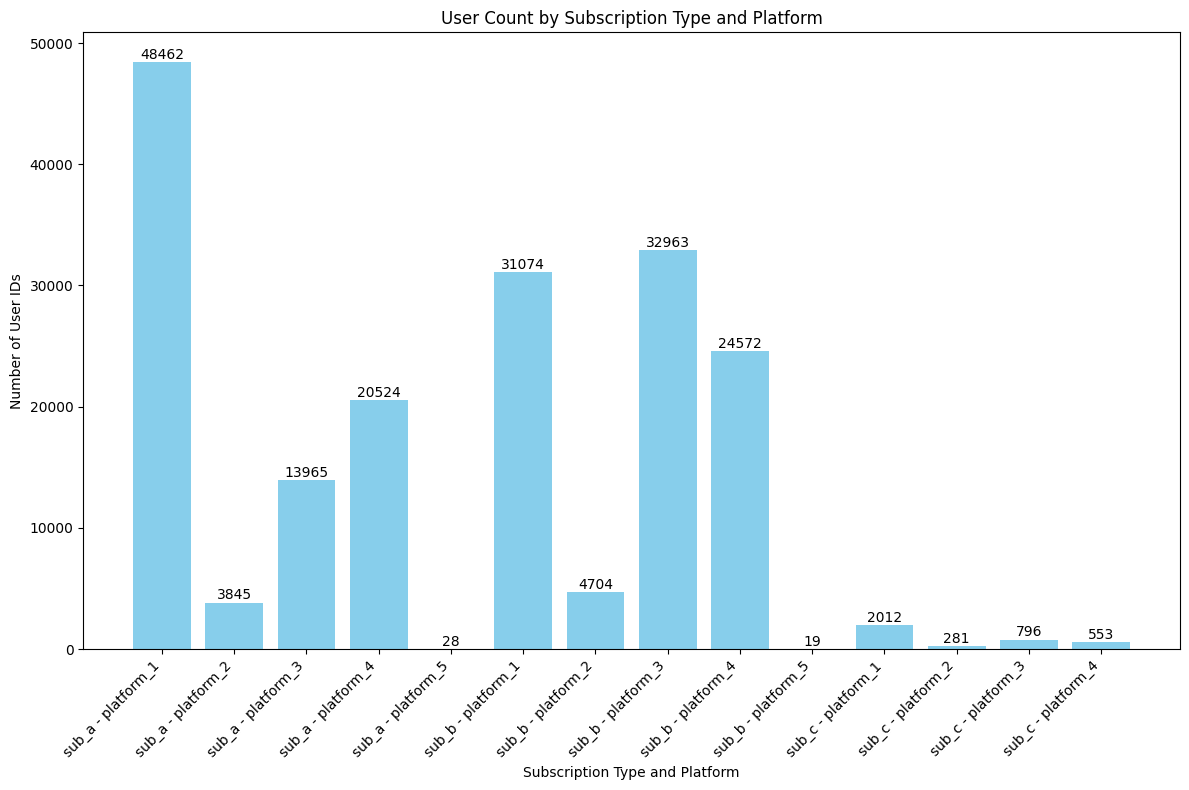

In [57]:
# Group by subscription type and platform, then count the number of unique user ids
subscription_platform_counts = onboarding_df.groupby(['subscription', 'platform'])['user id'].nunique()

# Reset index to make 'subscription' and 'platform' columns accessible
subscription_platform_counts = subscription_platform_counts.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(subscription_platform_counts.index, subscription_platform_counts['user id'], color='skyblue')

# Set labels and title
plt.xlabel('Subscription Type and Platform')
plt.ylabel('Number of User IDs')
plt.title('User Count by Subscription Type and Platform')

# Set x-axis labels
plt.xticks(subscription_platform_counts.index, [f"{row['subscription']} - {row['platform']}" for _, row in subscription_platform_counts.iterrows()], rotation=45, ha='right')

# Add labels to the bars
for i, count in enumerate(subscription_platform_counts['user id']):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

print(subscription_platform_counts)

# Display the plot
plt.tight_layout()
plt.show()

Platform 1 consistently exhibits the highest user engagement and activity levels among all platforms, making it the best-performing platform.
Platform 5 shows the lowest levels of user engagement and activity, indicating it as the least performing platform.
Platform 2 demonstrates stablility, with daily active users (DAU) and daily trends in user activity. However, the average events per user per day in Platform 2 drives in the middle with the other platform, which is great news.
Platform 3 experiences a notable drop in user events, DAU, and daily trends after July. This decline signals a significant change in user behavior or platform performance, warranting close monitoring and action to restore or stabilize user engagement levels.

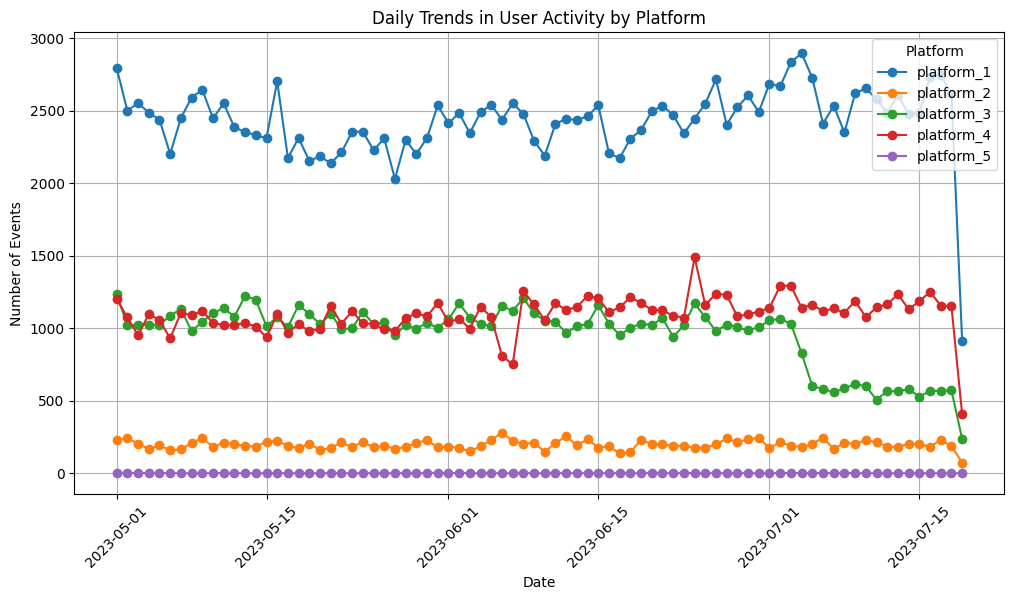

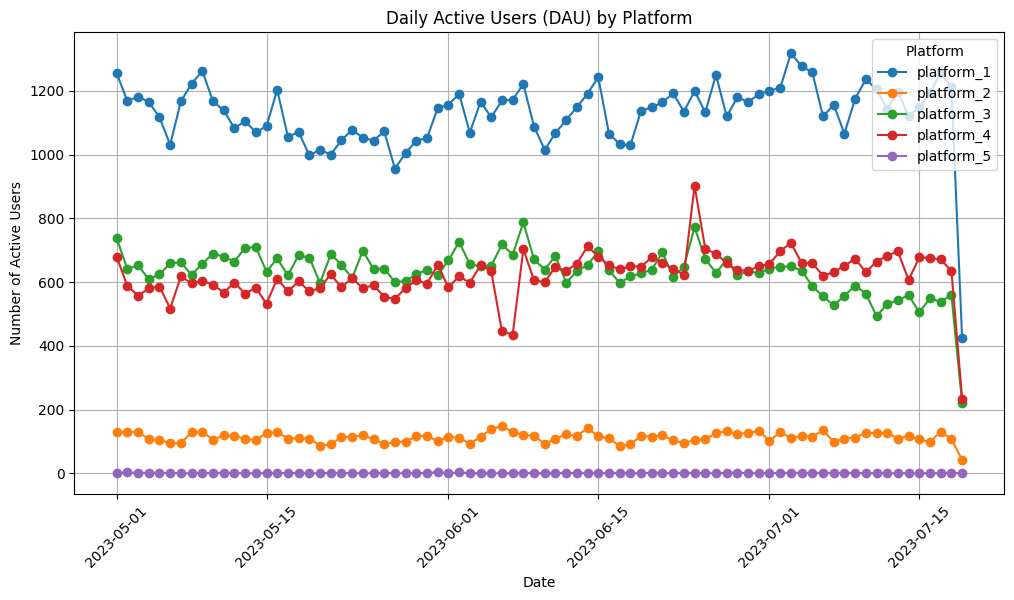

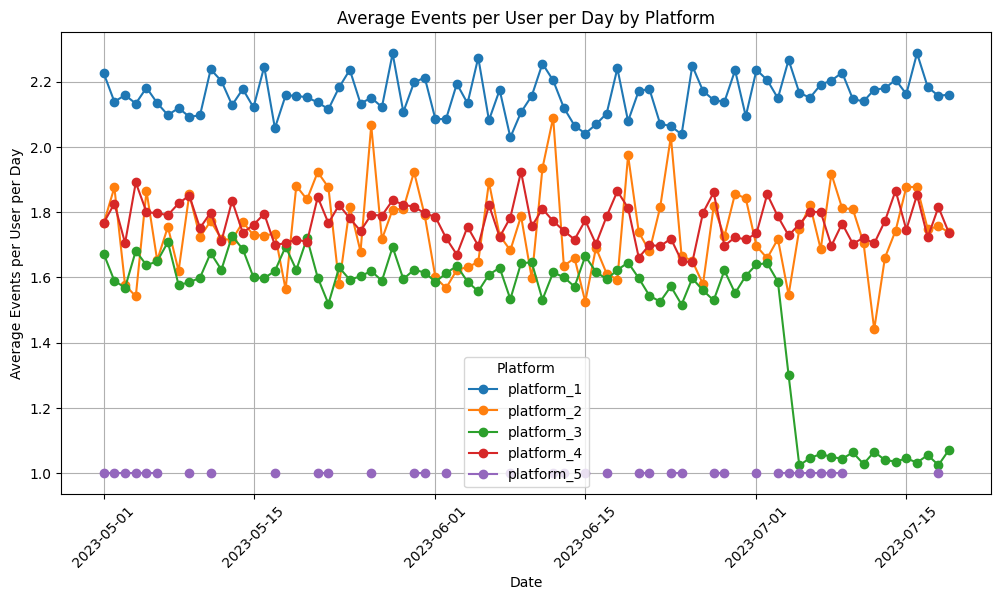

Daily Event Counts by Platform:
 event time  2023-05-01  2023-05-02  2023-05-03  2023-05-04  2023-05-05  \
platform                                                                 
platform_1        2794        2498        2552        2485        2437   
platform_2         226         242         205         165         194   
platform_3        1233        1019        1023        1024        1022   
platform_4        1200        1074         950        1097        1055   
platform_5           1           3           1           2           1   

event time  2023-05-06  2023-05-07  2023-05-08  2023-05-09  2023-05-10  ...  \
platform                                                                ...   
platform_1        2201        2448        2590        2643        2447  ...   
platform_2         157         165         209         243         181  ...   
platform_3        1087        1131         981        1043        1102  ...   
platform_4         929        1107        1089       

In [58]:
# Calculate daily event counts, DAU, and average events per user per day by platform
daily_event_counts = onboarding_df.groupby('platform').resample('D', on='event time').size().unstack(fill_value=0)
daily_active_users = onboarding_df.groupby('platform').resample('D', on='event time')['user id'].nunique().unstack(fill_value=0)
avg_events_per_user_per_day = daily_event_counts.div(daily_active_users, axis=0)

# Plot daily trends in user activity by platform
plt.figure(figsize=(12, 6))
for platform in daily_event_counts.index:
    plt.plot(daily_event_counts.columns, daily_event_counts.loc[platform], marker='o', linestyle='-', label=platform)
plt.title('Daily Trends in User Activity by Platform')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True)
plt.show()

# Plot daily active users by platform
plt.figure(figsize=(12, 6))
for platform in daily_active_users.index:
    plt.plot(daily_active_users.columns, daily_active_users.loc[platform], marker='o', linestyle='-', label=platform)
plt.title('Daily Active Users (DAU) by Platform')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True)
plt.show()

# Plot average events per user per day by platform
plt.figure(figsize=(12, 6))
for platform in avg_events_per_user_per_day.index:
    plt.plot(avg_events_per_user_per_day.columns, avg_events_per_user_per_day.loc[platform], marker='o', linestyle='-', label=platform)
plt.title('Average Events per User per Day by Platform')
plt.xlabel('Date')
plt.ylabel('Average Events per User per Day')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True)
plt.show()

# Display text output
print("Daily Event Counts by Platform:\n", daily_event_counts)
print("\nDaily Active Users (DAU) by Platform:\n", daily_active_users)
print("\nAverage Events per User per Day by Platform:\n", avg_events_per_user_per_day)

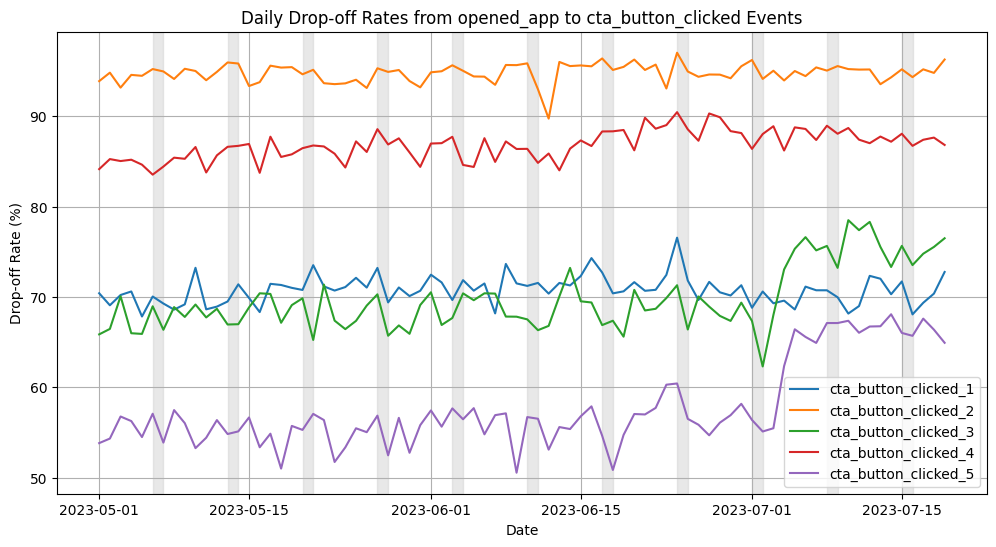

Daily Drop-off Rates:
            cta_button_clicked_1  cta_button_clicked_2  cta_button_clicked_3  \
event time                                                                     
2023-05-01             70.408163             93.877551             65.858844   
2023-05-02             69.077069             94.814462             66.460514   
2023-05-03             70.213777             93.159145             70.071259   
2023-05-04             70.605050             94.568842             65.983802   
2023-05-05             67.835968             94.466403             65.909091   
...                          ...                   ...                   ...   
2023-07-15             71.712963             95.185185             75.648148   
2023-07-16             68.067979             94.320215             73.524150   
2023-07-17             69.352014             95.183888             74.781086   
2023-07-18             70.367014             94.789307             75.532397   
2023-07-19        

In [59]:
import numpy as np

# Group the data by date and event
daily_events = onboarding_df.set_index('event time').groupby([pd.Grouper(freq='D'), 'event']).size().unstack(fill_value=0)

# Calculate the drop-off rates for each end event
daily_dropoff_rates = {}
for end_event in end_events:
    start_count = daily_events['opened_app']
    end_count = daily_events[end_event]
    dropoff_rate = (1 - (end_count / start_count)) * 100
    daily_dropoff_rates[end_event] = dropoff_rate

# Convert daily drop-off rates dictionary to a DataFrame
daily_dropoff_df = pd.DataFrame(daily_dropoff_rates)

# Plot the daily drop-off rates over time
plt.figure(figsize=(12, 6))
for end_event in end_events:
    plt.plot(daily_dropoff_df.index, daily_dropoff_df[end_event], label=end_event)

# Highlight weekends in the background (starting from Monday)
weekend_indices = np.where(daily_dropoff_df.index.weekday >= 5)[0]
for i in range(0, len(weekend_indices), 2):
    if i+1 < len(weekend_indices):
        plt.axvspan(daily_dropoff_df.index[weekend_indices[i]], daily_dropoff_df.index[weekend_indices[i+1]], color='lightgrey', alpha=0.5)

plt.title('Daily Drop-off Rates from opened_app to cta_button_clicked Events')
plt.xlabel('Date')
plt.ylabel('Drop-off Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Display text output
print("Daily Drop-off Rates:")
print(daily_dropoff_df)
